# Clustering drills

Welcome, traveler, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [Pokémon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

In the example, we wanted to determine the **most physically diverse** [Pokémon](./assets/pokemon.csv) team there is. To do so, we clustered the Pokémon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The Pokémon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the Pokémon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualize these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar Pokémon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** Pokémon groups from which you can determine your Pokémon team similar to the method described in the example.

NameError: name 'pokemon_dissimilarity' is not defined

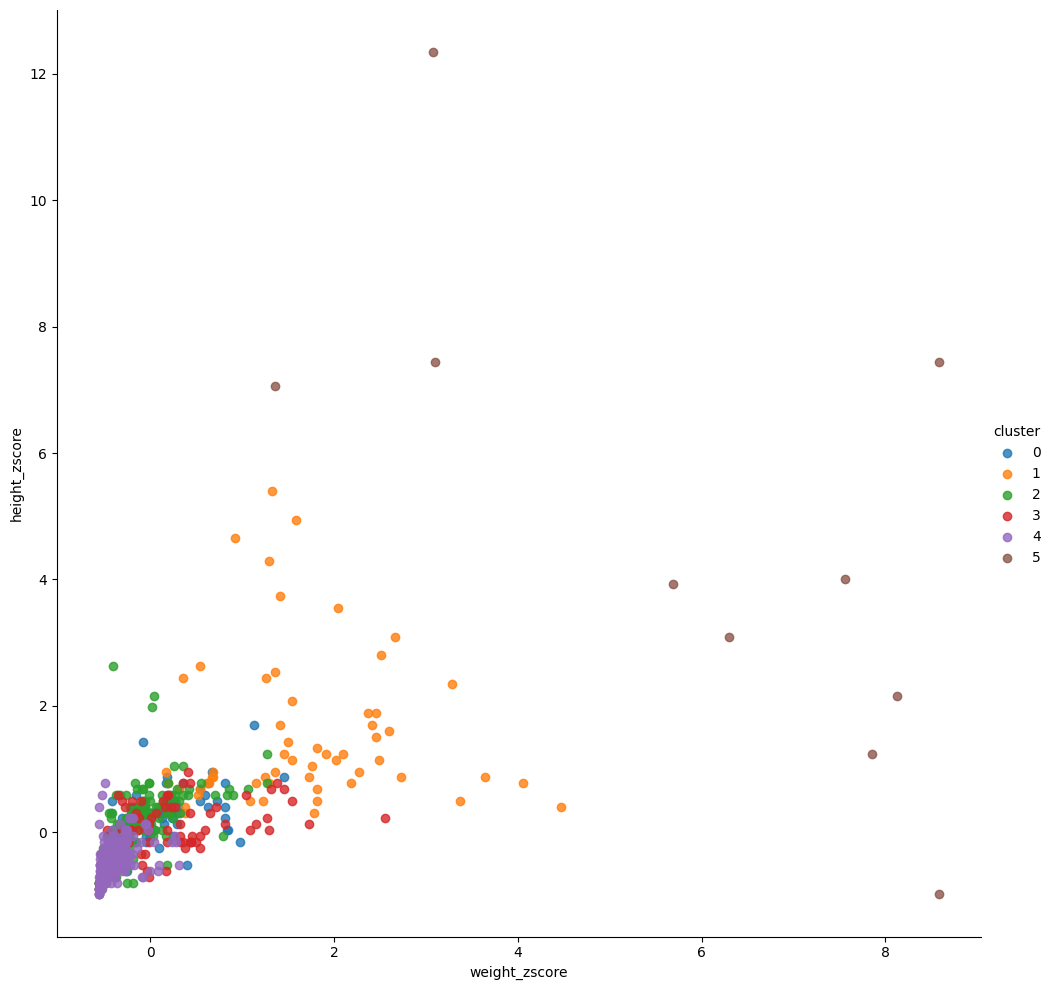

In [17]:
# cluster your Pokémon here

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns

pokemon = pd.read_csv("./assets/pokemon.csv")

# drop rows containing null values for weight or height
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

# adjusting index
pokemon = pokemon.reset_index(drop=True)

# number of Pokémon clusters
team_size = 6

# make new dataframe with relevant metrics
pokemon_metrics = pokemon['weight_kg'].to_frame().join(pokemon['height_m'].to_frame().join(pokemon['hp'].to_frame()).join(pokemon['attack'].to_frame()).join(pokemon['defense'].to_frame()).join(pokemon['speed'].to_frame()))

# z-score normalisation
pokemon_metrics_normalized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_normalized = pokemon_metrics_normalized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore', 'hp':'hp_zscore'
                                                                        , 'attack':'attack_zscore', 'defense':'defense_zscore'
                                                                        , 'speed':'speed_zscore'})

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_normalized = pokemon_metrics_normalized.join(cluster_labels.to_frame())

sns.lmplot(x='weight_zscore', y='height_zscore',  height=10, data=pokemon_metrics_normalized,
           fit_reg=False, hue='cluster')

def distance_to_other_clusters(pokemon):
    if not pokemon.loc[pokemon.isin(['weight_zscore', 'height_zscore', 'cluster'])].all():
        return
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['weight_zscore', 
                        pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore']
                        , pokemon['speed_zscore']]])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all Pokémon
pokemon_dissimilarity = pokemon_metrics_normalized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_normalized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar Pokémon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])



In [ ]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)

In [ ]:
# determine your final Pokémon here

## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - Manhattan distance
    - Squared distance
    - 1/(Squared distance)

In [ ]:
# Assign dissimilarity to your Pokémon here

Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse Pokémon team** possible...or is it?

We have clustered our Pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **Pokémon type**?

Some of the chosen Pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the Pokémon into 6 groups according to similar:
    - weight
    - height
    - primary Pokémon type
    - secondary Pokémon type
- determine the most dissimilar Pokémon team from these clusters

But wait, these Pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 Pokémon types, and Pokémon can only have one type. Vectorizing a **grass**, **fire**, and **water** Pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [ ]:
# vectorize your Pokémon type data here (there are modules that vectorize data)

In [ ]:
# cluster your multi-dimensional Pokémon data here

In [ ]:
# determine your unique team here

But wait, did you properly **normalize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example normalizes its data using the **z-score**. What does this mean? Z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

In the case of the Pokémon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the Euclidean distance between points of data would be larger.

For example, a Pokémon weighing 200kg and measuring 4m is about **as similar** as another Pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **Pokémon types** into vectors of length one, the **Euclidean distance** between one Pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **Pokémon type** matters more than **weight or height**?

In [ ]:
# normalize and scale your data in such a way that Pokémon type similarity matters more than the other metrics

## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this exercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the Pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every Pokémon in a cluster to every other Pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximizing in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

In [ ]:
# compare your techniques here